# Machine Intelligence II SoSe 2016 Exercise 5

The Nebenhoerers: Danijar Hafner, Thomas Kellermeier, Patrick Kuhn, Jan Szynal

## 5.1.1 Sample Laplace from uniform random variable

Probability density function

$$
p_X(x)=\frac{1}{2b}exp\left(-\frac{|x-\mu|}{b}\right)
$$

Splitting the pdf into two parts in order to eliminate absolute value 

$$
p_X(x)=\begin{cases}
  \frac{1}{2b}exp(\frac{x-\mu}{b})& \text{if } x\lt\mu\\
  \frac{1}{2b}exp(-\frac{x-\mu}{b})& \text{if } x\geq\mu
\end{cases}
$$

Definition cumulative density function

$$
F_X(x)=\int_{0}^{x}p_X(x)dx \\
$$

Building the antiderivative: 

$$
\begin{cases}
  \frac{1}{2}exp(\frac{x-\mu}{b})& \text{if } x\lt\mu\\
  1 - \frac{1}{2}exp(-\frac{x-\mu}{b})& \text{if } x\geq\mu
\end{cases}
$$

Inverse cumulative density function for $x\lt\mu$

$$
\frac{1}{2}exp(\frac{x-\mu}{b}) = y \\
\frac{x-\mu}{b} = ln(2y) \\
x = ln(2y) * b + \mu
$$

Inverse cumulative density function for $x\geq\mu$
$$
1 - \frac{1}{2}exp(-\frac{x-\mu}{b}) = y\\
exp(-\frac{x-\mu}{b}) = -2 * (y - 1) \\
x-\mu = ln(-2 * (y - 1)) * b \\
x = b * ln(-2y + 2) + \mu 
$$


Complete inverse cumulative density function
$$
F_X^{-1}(x)=\begin{cases}
  b\log(2y)+\mu& \text{if } y\lt 0.5\\
  \mu-b\log(-2y+2)& \text{if } y\geq 0.5
\end{cases}
$$


## 5.1.2 Compute samples and overlay density function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


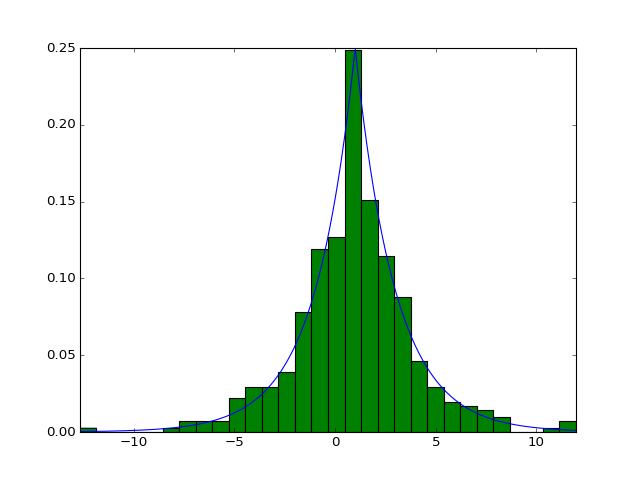

In [2]:
def p_X(x, µ=1, b=2):
    return 1 / (2 * b) * np.exp(-(np.abs(x - µ) / b))

def F_X_inv(y, µ=1, b=2):
    lower = np.log(2 * y) * b + µ
    upper = µ - np.log(-2 * y + 2) * b
    return (y < 0.5) * lower + (y >= 0.5) * upper

samples = F_X_inv(np.random.random(500))
min_, max_ = samples.min(), samples.max()
steps = np.linspace(min_, max_, 500)
density = p_X(steps)

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.plot(steps, density)
ax.set_xlim(min_, max_)
ax.hist(samples, normed=True, bins=30)
plt.show()